### Importing necessary libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier

# Data Preparation

##### We first read data using `pandas.read_csv` method.

In [3]:
df = pd.read_csv('iris.csv')

##### showing first 5 rows of data

In [ ]:
df.head()

##### ploting some features

In [4]:
colors = {
    'Setosa':'red',
    'Versicolor': 'blue',
    'Virginica':'green'
}

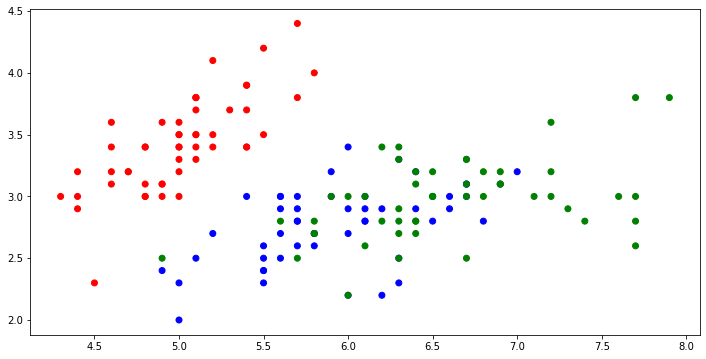

In [5]:
plt.figure(figsize=(12,6))
plt.scatter(df['sepal.length'], df['sepal.width'], c=df['variety'].map(colors))

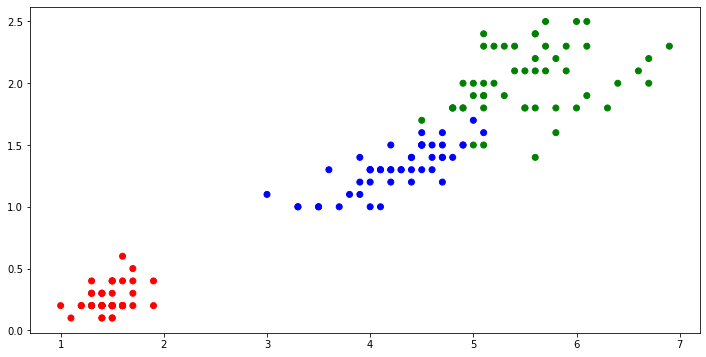

In [6]:
plt.figure(figsize=(12,6))
plt.scatter(df['petal.length'], df['petal.width'], c=df['variety'].map(colors))


##### normalizing data

In [12]:
X = df.drop('variety', axis=1)
y = df['variety']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

##### splitting data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape, y_train.shape

((120, 4), (120,))

# Training Model

##### Linear SVC

In [15]:
model = LinearSVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc_linearSVC = metrics.accuracy_score(y_test, pred)
print(acc_linearSVC)

0.9666666666666667


##### SVC

In [16]:
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc_SVC = metrics.accuracy_score(y_test, pred)
print(acc_SVC)

1.0


##### KNN Classifier

In [17]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc_knn = metrics.accuracy_score(y_test, pred)
print(acc_knn)

1.0


In [21]:
pd.DataFrame([[acc_linearSVC, acc_SVC, acc_knn]], columns=['LinearSVC', 'SVC', 'KNeighborsClassifier'])

,LinearSVC,SVC,KNeighborsClassifier
0,0.966667,1.0,1.0


# Neural Network

به عنوان ورودی شبکه ی عصبی باید مقادیر عددی داشته باشیم.مقادیر کلاس موجود در دیتا از نوع کلمات و غیر عددی بود. به این ترتیب باید این مقادیر تبدیل شوند. در ادامه این بخش از دیتا را به عدد تبدیل می کنیم

In [52]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

In [53]:
classes = {
    'Setosa':0,
    'Versicolor':1,
    'Virginica':2
           }

new_y_train = []
for y in y_train:
    new_y_train.append(classes[y])


new_y_test = []
for y in y_test:
    new_y_test.append(classes[y])

در شبکه های عصبی، داده ها کلاسیفیکشن بهتر است با استفاده از تکنیکی به نام
one hot encoding 
تبدیل شوند
در این بخش این تبدیل صورت گرفته است.

In [69]:
new_y_train = to_categorical(np.array(new_y_train))
new_y_test = to_categorical(np.array(new_y_test))

In [68]:
model = Sequential()

model.add(Input(X_train.shape))
model.add(Dense(4))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(new_y_train.shape[-1], activation='sigmoid'))

opt = SGD(learning_rate=5e-2)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(
    X_train, new_y_train, 
    batch_size=32, 
    validation_data=(X_test, new_y_test), 
    epochs=100
)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/4 [======>.......................] - ETA: 1s - loss: 1.2884 - accuracy: 0.3125WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fdc605d38c8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and a